In [74]:
# import libraries
  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Checking null values: 

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Data visualization:

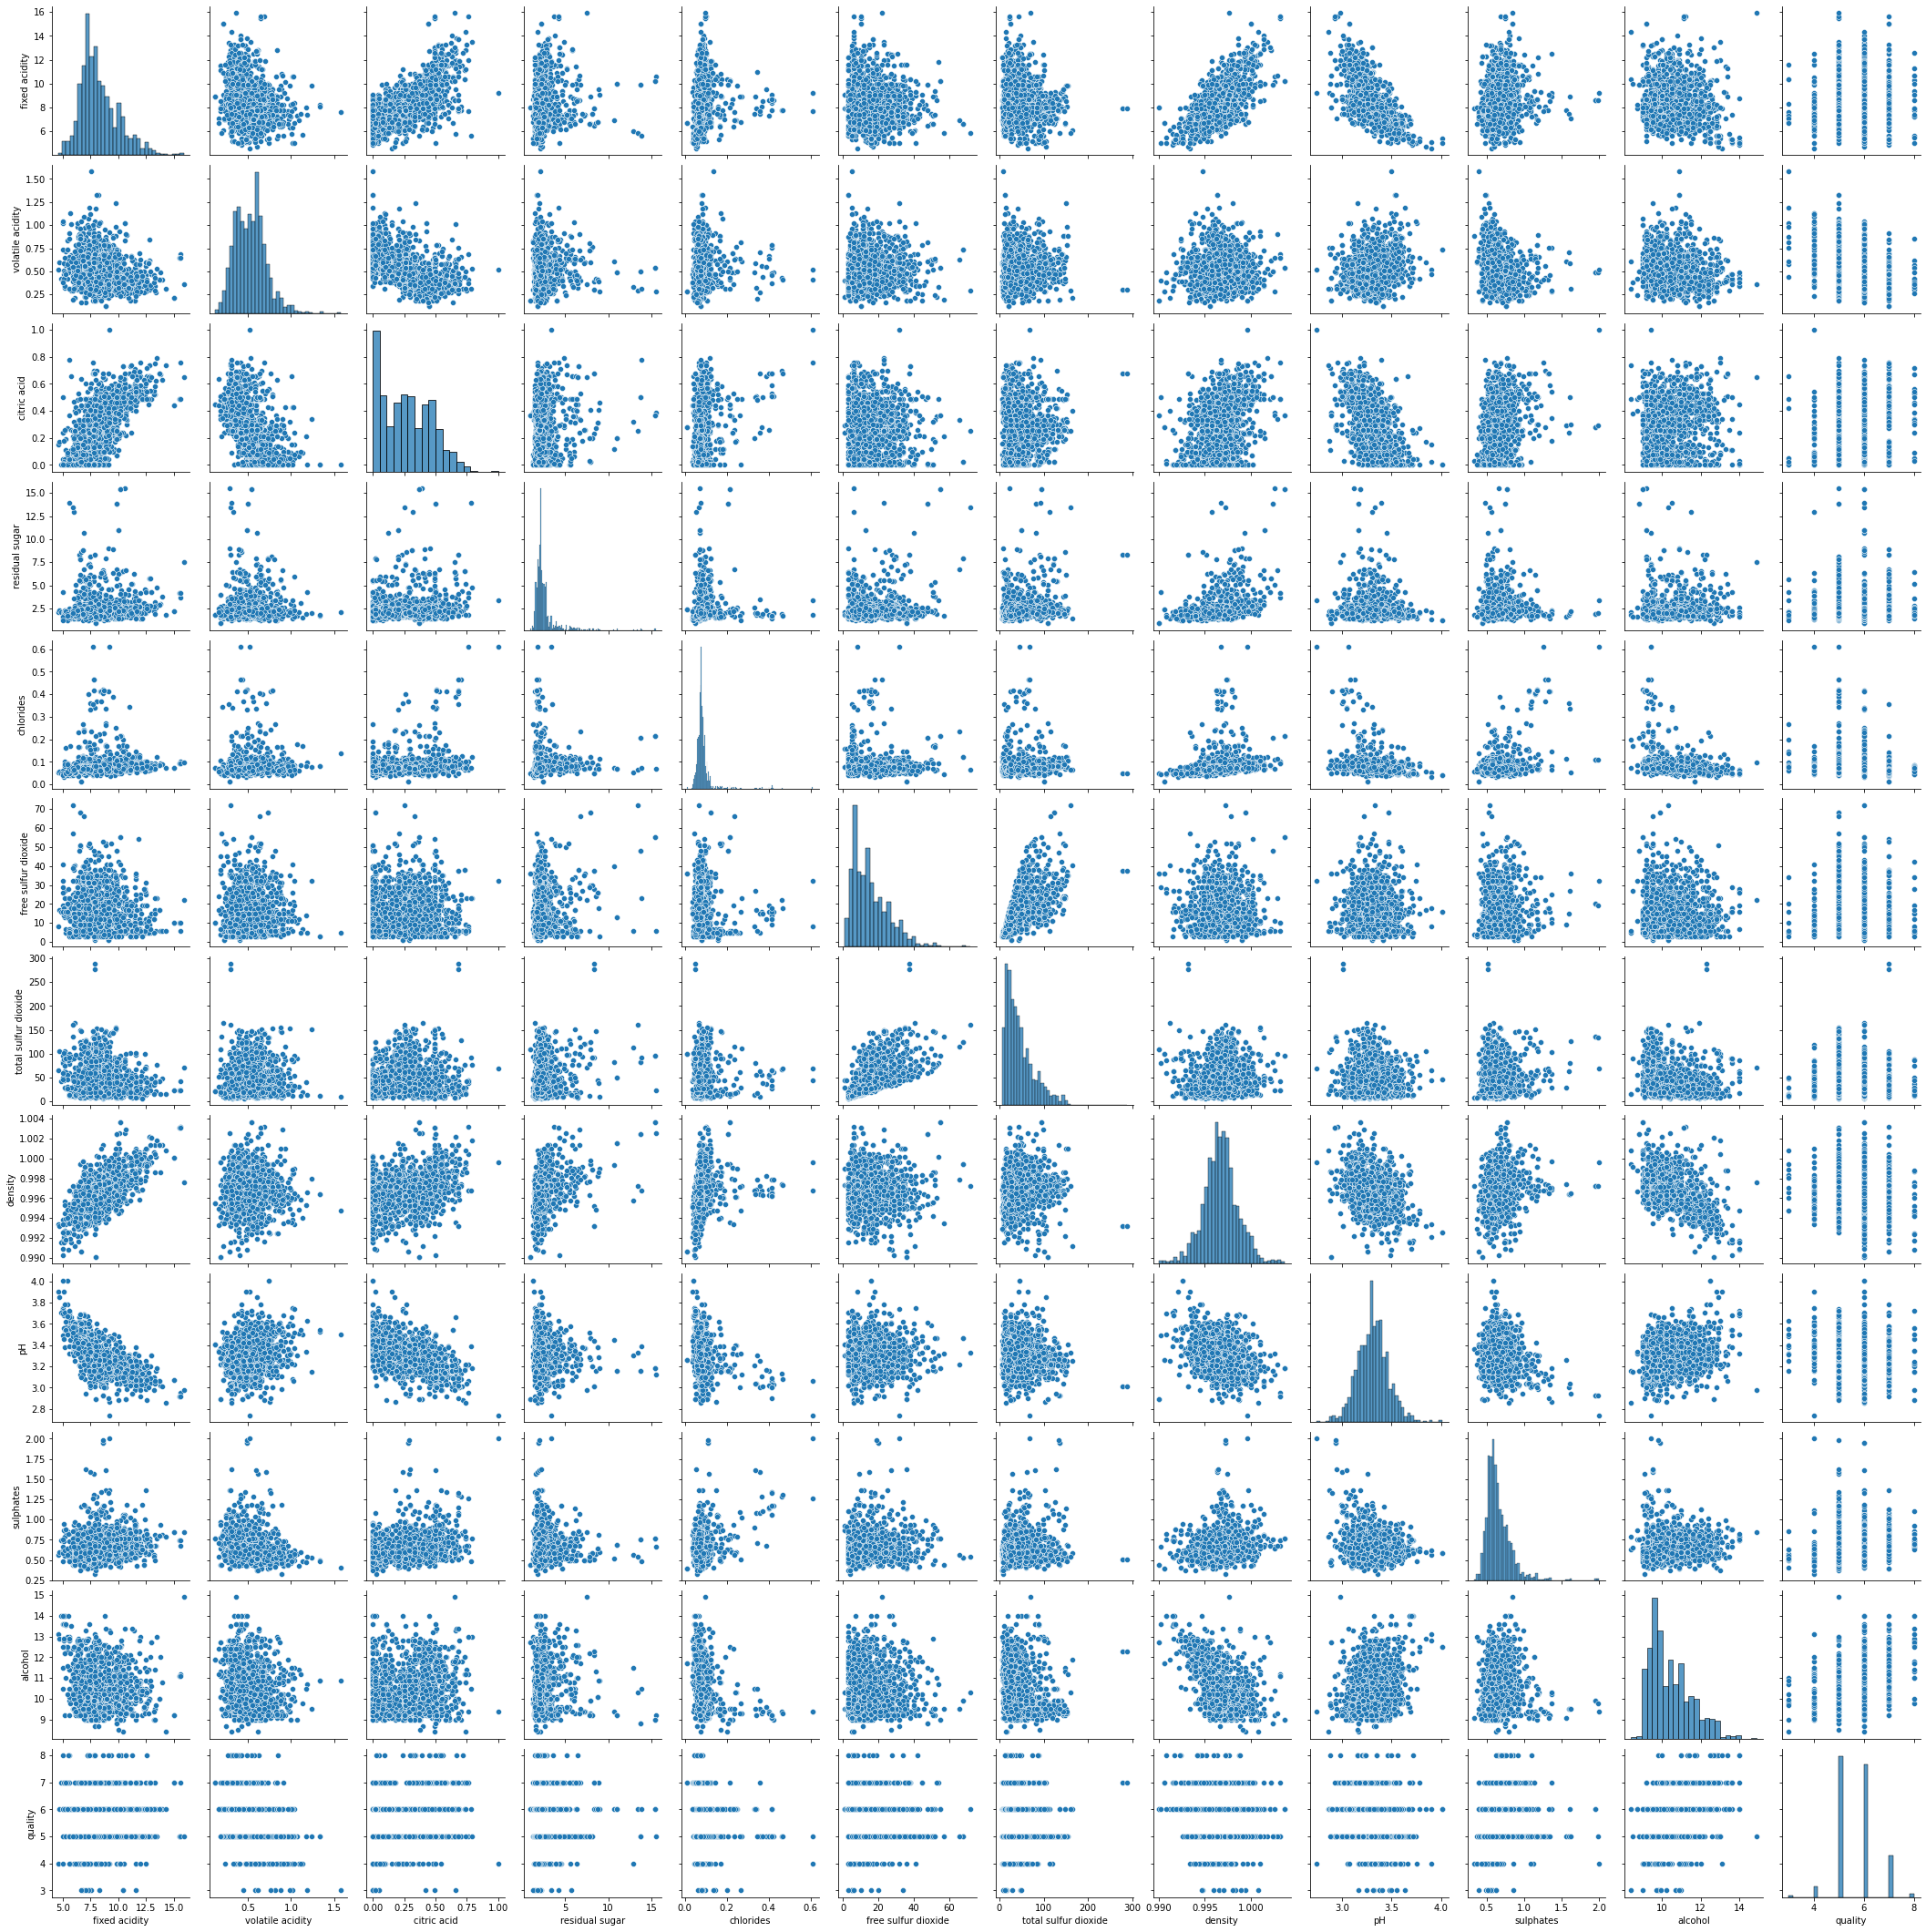

In [7]:
# plot pairplot
sb.pairplot(df)
#show graph
plt.show()

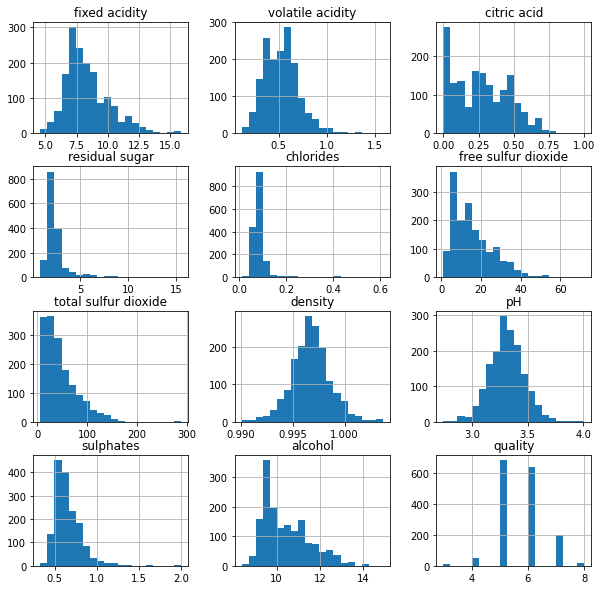

In [9]:
#plot histogram
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

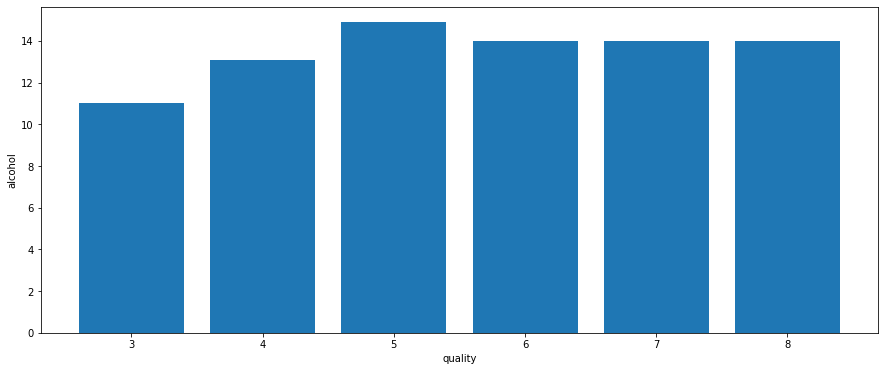

In [10]:
plt.figure(figsize=[15,6])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

#### Checking the correlation: 

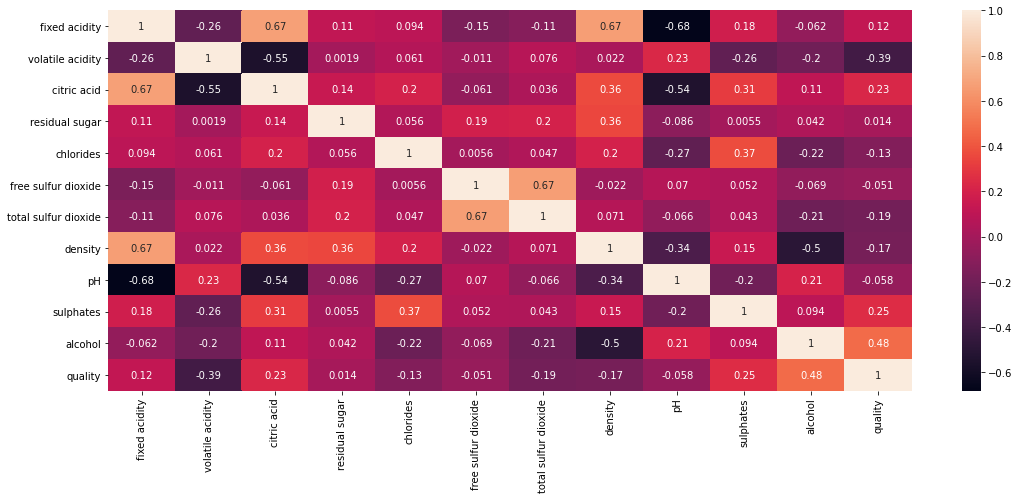

In [12]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

#### From this correlation visualization, we will find which features are correlated with other features. so we will use a python program to find those features.

In [15]:
colm = []
# loop for columns
for i in range(len(df.corr().keys())): 
# loop for rows
    for j in range(i):
        if abs(df.corr().iloc[i,j]) > 0.7:
            colm = df.corr().columns[i]

In [16]:
new_df = df.drop('total sulfur dioxide',axis = 1)

#### Categorizing the wine quality: 

In [29]:
categor_condn=[ (df['quality']>=7),
               (df['quality']<=4)]
rating=['superior','inferior']
df['rating'] = np.select(categor_condn,rating,default='fine')

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality rating  
0      9.4        5   fine  
1      9.8        5   fine  
2      9.8        5   fine  
3      9.8        6   fine  
4      9.4        5   fine

In [30]:
df['rating'].value_counts()

fine        1319
superior     217
inferior      63
Name: rating, dtype: int64

In [31]:
df.groupby('rating').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
rating                                                                   
fine           8.254284          0.538560     0.258264        2.503867   
inferior       7.871429          0.724206     0.173651        2.684921   
superior       8.847005          0.405530     0.376498        2.708756   

          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
rating                                                                     
fine       0.088973            16.368461             48.946929  0.996867   
inferior   0.095730            12.063492             34.444444  0.996689   
superior   0.075912            13.981567             34.889401  0.996030   

                pH  sulphates    alcohol   quality  
rating                                              
fine      3.311296   0.647263  10.252717  5.483700  
inferior  3.384127   0.592222  10.215873  3.841270  
superior  3.288802   0.743456  11.518049  7.082949

In [37]:
fig = px.histogram(df, x="alcohol", color="rating",marginal="violin")
fig.update_traces(opacity=0.85)
fig.show()

In [39]:
fig = px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide", color="rating",
                 facet_col="rating", title="Total SO2, free SO2 Vs Rating")

fig.update_xaxes(showgrid=False)

fig.show()

In [40]:
fig = px.scatter(df, x="volatile acidity", y="alcohol", color="rating",
                 facet_col="rating", title="Alcohol, Volatile Alcohol Vs Rating")

fig.update_xaxes(showgrid=False)

fig.show()

#### MODEL BUILDING

In [41]:
categor_condn=[(df['quality']<=5)]
               
rating=['inferior']
df['rating'] = np.select(categor_condn,rating,default='fine')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality    rating  
0      9.4        5  inferior  
1      9.8        5  inferior  
2      9.8        5  inferior  
3      9.8        6      fine  
4      9.4        5  inferior

In [42]:
df = df.drop(['quality'], axis='columns')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol    rating  
0      9.4  inferior  
1      9.8  inferior  
2      9.8  inferior  
3      9.8      fine  
4      9.4  inferior

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['rating'] = labelencoder_y.fit_transform(df['rating'])

In [44]:
X = df.drop('rating', axis = 1).values
y = df['rating'].values.reshape(-1,1)

### Splitting into train and test

In [45]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=50)

### Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
# To store the accuracy result of all the models
results =[]

### 1. Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
model_LR.fit(X_train_scale, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [50]:
cv_score_LR = cross_val_score(estimator = model_LR, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('LOGISTIC REGRESSION REPORT')
print("CV Score: ", cv_score_LR.mean())

y_train_predict_LR = model_LR.predict(X_train_scale)
train_accuracy_LR = accuracy_score(y_train, y_train_predict_LR)
print("Training set accuracy: ", train_accuracy_LR)

y_test_predict_LR = model_LR.predict(X_test_scale)
test_accuracy_LR = accuracy_score(y_test, y_test_predict_LR)
print("Test set accuracy: ", test_accuracy_LR)

results.append(test_accuracy_LR)

LOGISTIC REGRESSION REPORT
CV Score:  0.7577622265122266
Training set accuracy:  0.7676496872207328
Test set accuracy:  0.7020833333333333


In [51]:
confusion_matrix(y_test, y_test_predict_LR)

array([[172,  58],
       [ 85, 165]], dtype=int64)

### 2.KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 36, weights = 'distance')
model_KNN.fit(X_train_scale, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=36, weights='distance')

In [54]:
cv_score_KNN = cross_val_score(estimator = model_KNN, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('KNN REPORT')
print("CV Score: ", cv_score_KNN.mean())

y_train_predict_KNN = model_KNN.predict(X_train_scale)
train_accuracy_KNN = accuracy_score(y_train, y_train_predict_KNN)
print("Training set accuracy: ", train_accuracy_KNN)

y_test_predict_KNN = model_KNN.predict(X_test_scale)
test_accuracy_KNN = accuracy_score(y_test, y_test_predict_KNN)
print("Test set accuracy: ", test_accuracy_KNN)

results.append(test_accuracy_KNN)

KNN REPORT
CV Score:  0.7765363577863578
Training set accuracy:  1.0
Test set accuracy:  0.7270833333333333


In [55]:
confusion_matrix(y_test, y_test_predict_KNN)

array([[190,  40],
       [ 91, 159]], dtype=int64)

### 3.Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
model_DT.fit(X_train_scale, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [57]:
cv_score_DT = cross_val_score(estimator = model_DT, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('DT REPORT')
print("CV Score: ", cv_score_DT.mean())

y_train_predict_DT = model_DT.predict(X_train_scale)
train_accuracy_DT = accuracy_score(y_train, y_train_predict_DT)
print("Training set accuracy: ", train_accuracy_DT)

y_test_predict_DT = model_DT.predict(X_test_scale)
test_accuracy_DT = accuracy_score(y_test, y_test_predict_DT)
print("Test set accuracy: ", test_accuracy_DT)

results.append(test_accuracy_DT)

DT REPORT
CV Score:  0.7425434362934362
Training set accuracy:  1.0
Test set accuracy:  0.70625


In [58]:
confusion_matrix(y_test, y_test_predict_DT)

array([[175,  55],
       [ 86, 164]], dtype=int64)

### 4.Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 900, random_state=40)
model_RF.fit(X_train_scale, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=900,
                       random_state=40)

In [60]:
cv_score_RF = cross_val_score(estimator = model_RF, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('RF REPORT')
print("CV Score: ", cv_score_RF.mean())

y_train_predict_RF = model_RF.predict(X_train_scale)
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
print("Training set accuracy: ", train_accuracy_RF)

y_test_predict_RF = model_RF.predict(X_test_scale)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)
print("Test set accuracy: ", test_accuracy_RF)

results.append(test_accuracy_RF)

RF REPORT
CV Score:  0.7979810167310168
Training set accuracy:  1.0
Test set accuracy:  0.7875


In [61]:
confusion_matrix(y_test, y_test_predict_RF)

array([[196,  34],
       [ 68, 182]], dtype=int64)

### 5.SVM

In [62]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train_scale, y_train.ravel())

SVC()

In [63]:
cv_score_SVC = cross_val_score(estimator = model_SVC, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('SVC REPORT')
print("CV Score: ", cv_score_SVC.mean())

y_train_predict_SVC = model_SVC.predict(X_train_scale)
train_accuracy_SVC = accuracy_score(y_train, y_train_predict_SVC)
print("Training set accuracy: ", train_accuracy_SVC)

y_test_predict_SVC = model_SVC.predict(X_test_scale)
test_accuracy_SVC = accuracy_score(y_test, y_test_predict_SVC)
print("Test set accuracy: ", test_accuracy_SVC)

results.append(test_accuracy_SVC)

SVC REPORT
CV Score:  0.7809925997425997
Training set accuracy:  0.8168007149240393
Test set accuracy:  0.7083333333333334


In [64]:
confusion_matrix(y_test, y_test_predict_SVC)

array([[171,  59],
       [ 81, 169]], dtype=int64)

In [69]:
result_df = DataFrame({"ML Models":["Logistic Regression","KNN",
             "Decision Tree","Random Forest","SVC"],"Score":results})

In [70]:
result_df.style.background_gradient("Blues")

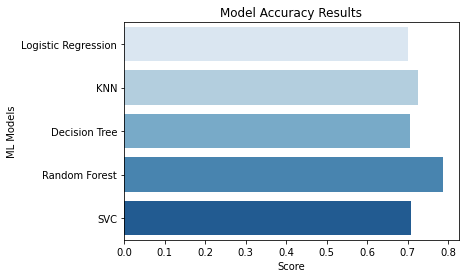

In [75]:
g = sns.barplot("Score", "ML Models", data = result_df, palette='Blues')
g.set_xlabel("Score")
g.set_title("Model Accuracy Results", color = "Black")
plt.show()